In [29]:
import sys
import pandas as pd

sys.path.append("..")
import seaborn as sns
import rbf_functions

In [3]:
rbfs = [
    rbf_functions.original_rbf,
    rbf_functions.squared_exponential_rbf,
    rbf_functions.inverse_quadratic_rbf,
    rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    rbf_functions.matern32_rbf,
    rbf_functions.matern52_rbf,
]

In [40]:
paretosets = {}
rbfd = {}
for entry in rbfs:
    rbf = entry.__name__
    rbfd[rbf] = {}
    data = pd.read_csv(f"refsets/{rbf}_refset.csv")
    paretosets[rbf] = data
df_global = pd.read_csv(f"refsets/global_refset.csv")

In [42]:
for rbf in paretosets:
    print(f"{rbf}: {len(paretosets[rbf])}")

original_rbf: 1514
squared_exponential_rbf: 1357
inverse_quadratic_rbf: 1266
inverse_multiquadric_rbf: 1157
exponential_rbf: 946
matern32_rbf: 1294
matern52_rbf: 857


# Contribution to global reference set

In [23]:
l_global = df_global.values.tolist()
contribution = {}
templ = []
for rbf in paretosets:
    x = 0
    for solution in paretosets[rbf].values.tolist():
        if solution in l_global:
            templ.append(solution)
            x += 1
    contribution[rbf] = round(x / len(df_global), 3)
    rbfd[rbf] = pd.DataFrame(templ, columns=data.columns)
    templ = []
contribution

{'original_rbf': 0.556,
 'squared_exponential_rbf': 0.276,
 'inverse_quadratic_rbf': 0.042,
 'inverse_multiquadric_rbf': 0.097,
 'exponential_rbf': 0.001,
 'matern32_rbf': 0.01,
 'matern52_rbf': 0.017}

In [33]:
# https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

# pd.DataFrame.from_dict(rbfd, 'columns')
for k, v in rbfd.items():
    v["rbf"] = k

combined = pd.concat(rbfd.values())
combined.reset_index(inplace=True, drop=True)

In [34]:
combined.head()

,hydropower,atomicpowerplant,baltimore,chester,environment,recreation,rbf
0,75.387023,0.889018,0.452169,0.853073,0.081847,1.0,original_rbf
1,73.147682,0.854070,0.517482,0.760658,0.079363,1.0,original_rbf
2,59.763733,0.725240,0.856589,0.608674,0.086231,1.0,original_rbf
3,78.073371,0.935189,0.435674,0.906727,0.084793,1.0,original_rbf
4,74.489035,0.987076,0.624084,0.921027,0.084909,1.0,original_rbf


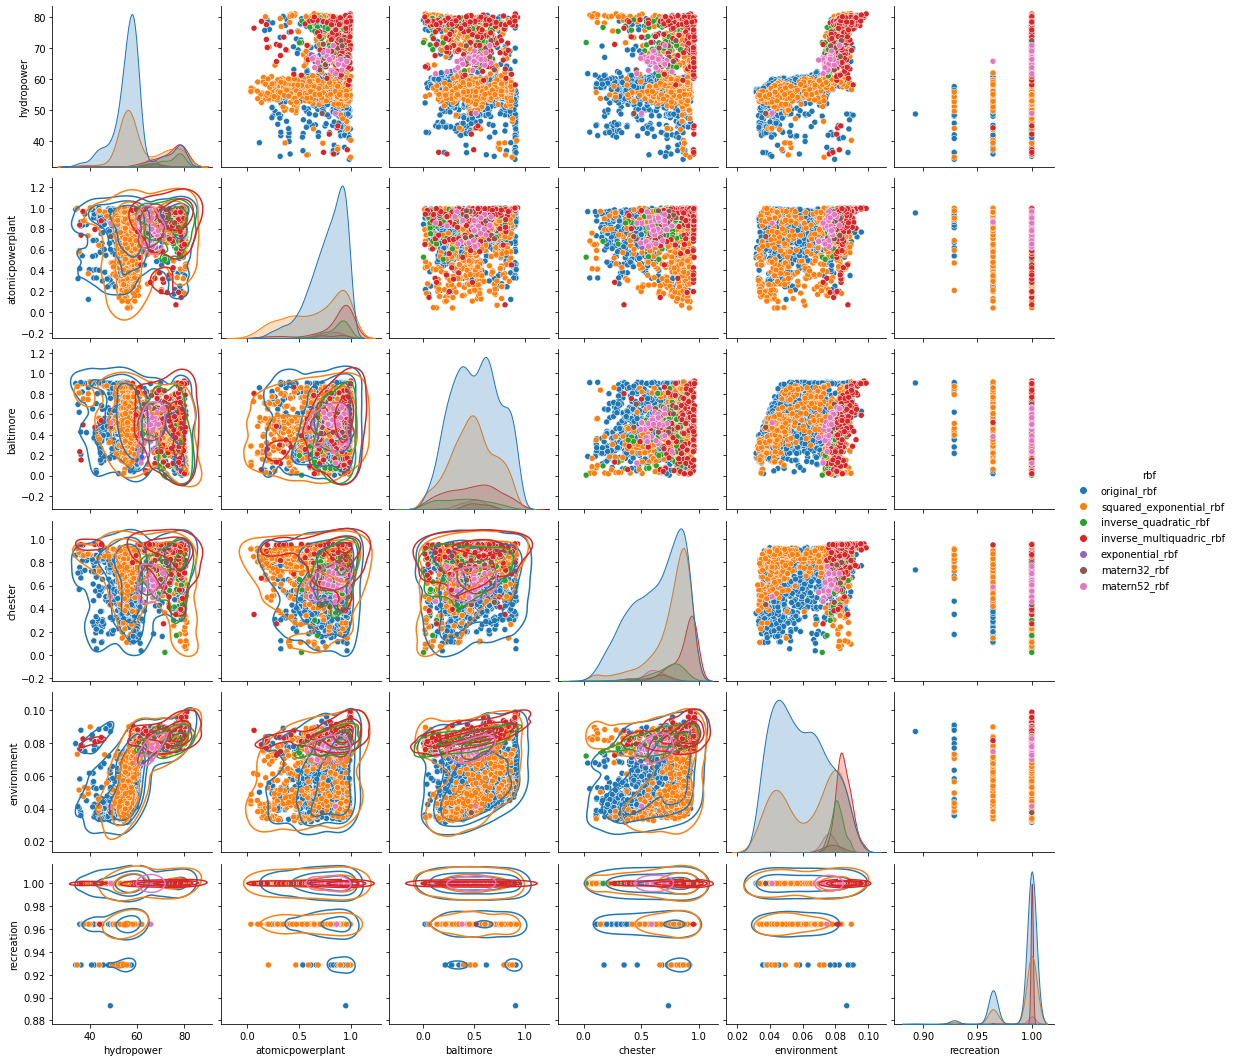

In [37]:
p = sns.pairplot(combined, hue="rbf")
p.map_lower(sns.kdeplot, levels=4, color=".2", warn_singular=False)